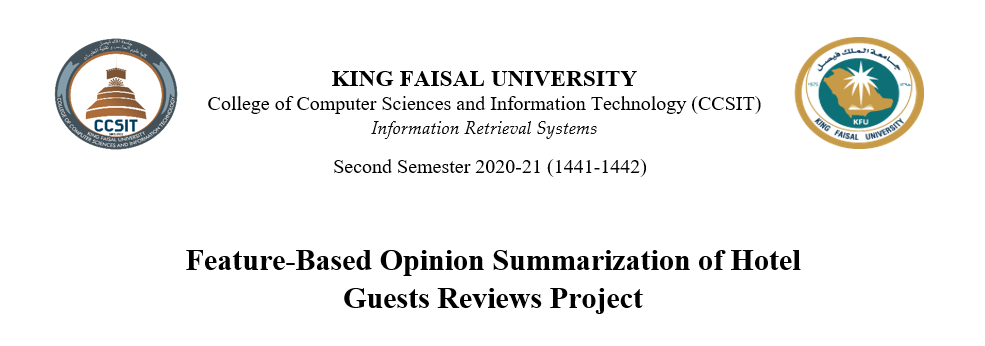

## By:
### Asmaa Al-Rashdi         ID:219002221
### Fatimah Alhelal         ID:221400283
### Ashwag Alharthi         ID:221400341
## Supervised By: Dr. Surbhi Bhatia


## Step 1: Import the Dataset

In [1]:
# import the library for using
import numpy as np
import pandas as pd

In [2]:
# import the date set from (https://www.kaggle.com/datafiniti/hotel-reviews)
df = pd.read_csv('Hotel_Reviews.csv')
df.head()

,id,dateAdded,dateUpdated,address,categories,primaryCategories,city,country,keys,latitude,...,reviews.dateSeen,reviews.rating,reviews.sourceURLs,reviews,title,reviews.userCity,reviews.userProvince,reviews.username,sourceURLs,websites
0,AVwc252WIN2L1WUfpqLP,2016-10-30T21:42:42Z,2018-09-10T21:06:27Z,5921 Valencia Cir,"Hotels,Hotels and motels,Hotel and motel reser...",Accommodation & Food Services,Rancho Santa Fe,US,us/ca/ranchosantafe/5921valenciacir/359754519,32.990959,...,"2016-08-03T00:00:00Z,2016-07-26T00:00:00Z,2016...",5.0,https://www.hotels.com/hotel/125419/reviews%20/,Our experience at Rancho Valencia was absolute...,Best romantic vacation ever!!!!,NaN,NaN,Paula,http://www.hotels.com/ho125419/%25252525253Flo...,http://www.ranchovalencia.com
1,AVwc252WIN2L1WUfpqLP,2016-10-30T21:42:42Z,2018-09-10T21:06:27Z,5921 Valencia Cir,"Hotels,Hotels and motels,Hotel and motel reser...",Accommodation & Food Services,Rancho Santa Fe,US,us/ca/ranchosantafe/5921valenciacir/359754519,32.990959,...,"2016-08-02T00:00:00Z,2016-08-26T00:00:00Z,2016...",5.0,https://www.hotels.com/hotel/125419/reviews%20/,Amazing place. Everyone was extremely warm and...,Sweet sweet serenity,NaN,NaN,D,http://www.hotels.com/ho125419/%25252525253Flo...,http://www.ranchovalencia.com
2,AVwc252WIN2L1WUfpqLP,2016-10-30T21:42:42Z,2018-09-10T21:06:27Z,5921 Valencia Cir,"Hotels,Hotels and motels,Hotel and motel reser...",Accommodation & Food Services,Rancho Santa Fe,US,us/ca/ranchosantafe/5921valenciacir/359754519,32.990959,...,"2016-11-15T00:00:00Z,2016-08-23T00:00:00Z,2016...",5.0,https://www.hotels.com/hotel/125419/reviews%20/,We booked a 3 night stay at Rancho Valencia to...,Amazing Property and Experience,NaN,NaN,Ron,http://www.hotels.com/ho125419/%25252525253Flo...,http://www.ranchovalencia.com
3,AVwdOclqIN2L1WUfti38,2015-11-28T19:19:35Z,2018-09-10T21:06:16Z,7520 Teague Rd,"Hotels,Hotels and motels,Travel agencies and b...",Accommodation & Food Services,Hanover,US,us/md/hanover/7520teaguerd/-2043779672,39.155929,...,"2016-05-21T00:00:00Z,2016-07-31T00:00:00Z",2.0,https://www.tripadvisor.com/Hotel_Review-g4118...,Currently in bed writing this for the past hr ...,"Never again...beware, if you want sleep.",Richmond,VA,jaeem2016,http://www.yellowbook.com/profile/aloft-arunde...,http://www.starwoodhotels.com/alofthotels/prop...
4,AVwdOclqIN2L1WUfti38,2015-11-28T19:19:35Z,2018-09-10T21:06:16Z,7520 Teague Rd,"Hotels,Hotels and motels,Travel agencies and b...",Accommodation & Food Services,Hanover,US,us/md/hanover/7520teaguerd/-2043779672,39.155929,...,2016-07-31T00:00:00Z,5.0,https://www.tripadvisor.com/Hotel_Review-g4118...,I live in Md and the Aloft is my Home away fro...,ALWAYS GREAT STAY...,Laurel,MD,MamaNiaOne,http://www.yellowbook.com/profile/aloft-arunde...,http://www.starwoodhotels.com/alofthotels/prop...


In [3]:
# stores the number of rows and columns as a tuple 
df.shape
# (number of rows, number of columns)

(10000, 25)

In [4]:
# select from the dataset only three coulms we will use
df = df[['city', 'reviews', 'title']]

In [5]:
# count the reviews for the highest 20th cities 
df['city'].value_counts().sort_values(ascending=False).head(20)

Las Vegas            506
Chicago              356
Virginia Beach       257
Boston               249
Arlington            217
Springfield          208
Hyattsville          202
Miami Beach          197
Baltimore            184
New Orleans          183
Atlanta              154
Charleston           149
Hanover              130
San Francisco        120
Lahaina              116
Seattle              111
Napa                 110
Linthicum Heights    101
Kissimmee            101
Phoenix               99
Name: city, dtype: int64

## Step 2: Clean the reviews from the Dataset

In [6]:
# # import the library for using 
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords as sw
import string
from sklearn.feature_extraction.text import CountVectorizer as countV

In [7]:
# create funcation to clean the dataset 
def text_cleaning(text):
 remove_sample = [char for char in text if char not in string.punctuation]
 remove_sample = ''.join(remove_sample)
 return [word for word in remove_sample.split() if word.lower() not in sw.words('english')]
 

In [8]:
# print the 20th rows from the dataset 
df.head(20)

,city,reviews,title
0,Rancho Santa Fe,Our experience at Rancho Valencia was absolute...,Best romantic vacation ever!!!!
1,Rancho Santa Fe,Amazing place. Everyone was extremely warm and...,Sweet sweet serenity
2,Rancho Santa Fe,We booked a 3 night stay at Rancho Valencia to...,Amazing Property and Experience
3,Hanover,Currently in bed writing this for the past hr ...,"Never again...beware, if you want sleep."
4,Hanover,I live in Md and the Aloft is my Home away fro...,ALWAYS GREAT STAY...
5,Hanover,I stayed here with my family for my daughters ...,Wonderful stay
6,Hanover,Beautiful rooms and the nicest people working ...,Worth the money
7,Hanover,We stayed here while visiting Maryland Live!. ...,Great Hotel Experiece!
8,Hanover,"I travel a lot with my job, so I'm constantly ...",Short stay for business.
9,Vancouver,"In my line of work, I use meeting space in hot...",Amazing employees and facilities


In [9]:
# apply cleaning funcation on the dataset
print(df.iloc[0:20,1].apply(text_cleaning))

0     [experience, Rancho, Valencia, absolutely, per...
1     [Amazing, place, Everyone, extremely, warm, we...
2     [booked, 3, night, stay, Rancho, Valencia, pla...
3     [Currently, bed, writing, past, hr, 12, dogs, ...
4     [live, Md, Aloft, Home, away, homewe, stayed, ...
5     [stayed, family, daughters, wedding, accommoda...
6     [Beautiful, rooms, nicest, people, working, fr...
7     [stayed, visiting, Maryland, Live, Cute, hotel...
8     [travel, lot, job, Im, constantly, staying, ho...
9     [line, work, use, meeting, space, hotels, ofte...
10    [staff, friendly, helpful, rooms, large, nicel...
11    [friendly, staff, great, free, breakfast, item...
12    [Upon, arriving, see, modern, yet, elegant, de...
13    [nice, hotel, great, staff, young, children, e...
14    [Beautiful, property, every, staff, member, en...
15    [Old, hotel, many, remaining, architectural, c...
16    [comfortable, room, son, came, couch, pulled, ...
17    [Stayed, second, time, recently, Gorgeous,

## Step 3: Calculate reviews' words freq and Classification

In [10]:
# CountVectorizer each words of the reviews from the dataset after cleaninig 
trns =  countV(analyzer=text_cleaning).fit(df['reviews'].head(20).values.astype('U'))
trns.vocabulary_

{'experience': 152,
 'Rancho': 55,
 'Valencia': 64,
 'absolutely': 67,
 'perfect': 262,
 'beginning': 102,
 'end': 145,
 'felt': 160,
 'special': 314,
 'happy': 181,
 'stayed': 322,
 'would': 374,
 'come': 120,
 'back': 90,
 'heart': 182,
 'beat': 99,
 'Amazing': 12,
 'place': 264,
 'Everyone': 24,
 'extremely': 153,
 'warm': 363,
 'welcoming': 367,
 'Weve': 65,
 'top': 343,
 'notch': 246,
 'places': 265,
 'definitely': 132,
 '2': 3,
 'Great': 32,
 'romantic': 294,
 'getaway': 172,
 'take': 331,
 'kids': 206,
 'along': 72,
 'couple': 126,
 'stuffed': 325,
 'animals': 78,
 'waiting': 360,
 'girls': 173,
 'upon': 350,
 'arrival': 83,
 'Cant': 17,
 'wait': 359,
 'go': 174,
 'booked': 106,
 '3': 6,
 'night': 243,
 'stay': 321,
 'play': 267,
 'tennis': 336,
 'since': 305,
 'one': 249,
 'highest': 187,
 'rated': 280,
 'resorts': 289,
 'America': 13,
 'really': 281,
 'luxury': 224,
 'standpoint': 319,
 'overall': 253,
 'villas': 355,
 'staff': 318,
 'great': 176,
 'attention': 88,
 'details':

In [11]:
# count the freq for each words in each reviews
word_num = trns.transform(df['reviews'].head(20))
print(word_num)

  (0, 55)	1
  (0, 64)	1
  (0, 67)	1
  (0, 90)	1
  (0, 99)	1
  (0, 102)	1
  (0, 120)	1
  (0, 145)	1
  (0, 152)	1
  (0, 160)	1
  (0, 181)	1
  (0, 182)	1
  (0, 262)	1
  (0, 314)	1
  (0, 322)	1
  (0, 374)	1
  (1, 3)	1
  (1, 12)	1
  (1, 17)	1
  (1, 24)	1
  (1, 32)	1
  (1, 65)	1
  (1, 72)	1
  (1, 78)	1
  (1, 83)	1
  :	:
  (19, 53)	1
  (19, 54)	1
  (19, 58)	1
  (19, 115)	1
  (19, 121)	1
  (19, 125)	1
  (19, 137)	1
  (19, 164)	1
  (19, 165)	1
  (19, 181)	1
  (19, 186)	1
  (19, 219)	1
  (19, 243)	1
  (19, 249)	1
  (19, 254)	1
  (19, 259)	1
  (19, 269)	1
  (19, 283)	1
  (19, 293)	1
  (19, 295)	1
  (19, 322)	1
  (19, 340)	1
  (19, 343)	1
  (19, 353)	1
  (19, 370)	1


In [12]:
import scipy
from sklearn import preprocessing, metrics
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer

In [13]:
# count the Tfidf for each words in each reviews
tfidf = TfidfTransformer().fit(word_num)
word_tfids = tfidf.transform(word_num)
print(word_tfids)
print(word_tfids.shape)

  (0, 374)	0.24816294216947338
  (0, 322)	0.16553806195330947
  (0, 314)	0.24816294216947338
  (0, 262)	0.24816294216947338
  (0, 182)	0.2823192500960585
  (0, 181)	0.24816294216947338
  (0, 160)	0.24816294216947338
  (0, 152)	0.223928656024684
  (0, 145)	0.2823192500960585
  (0, 120)	0.24816294216947338
  (0, 102)	0.2823192500960585
  (0, 99)	0.2823192500960585
  (0, 90)	0.17678672249929225
  (0, 67)	0.2823192500960585
  (0, 64)	0.24816294216947338
  (0, 55)	0.24816294216947338
  (1, 367)	0.1643626340223606
  (1, 363)	0.18698495099770693
  (1, 360)	0.18698495099770693
  (1, 359)	0.18698495099770693
  (1, 350)	0.18698495099770693
  (1, 343)	0.29662368938364136
  (1, 331)	0.18698495099770693
  (1, 325)	0.18698495099770693
  (1, 322)	0.1096387383859344
  :	:
  (19, 322)	0.12002958699619355
  (19, 295)	0.11283525257797322
  (19, 293)	0.17993985857321226
  (19, 283)	0.20470617204436536
  (19, 269)	0.20470617204436536
  (19, 259)	0.20470617204436536
  (19, 254)	0.20470617204436536
  (19, 24

## Step 4: Summarize​ Dataset Reviwes

In [14]:
# import summarize library for summarize each reviews in the dataset 
from gensim.summarization import summarize
de_sum = df['reviews'].head(30)
i=1
# print the reviews before summarize
for text in de_sum:
     print(f'{i}- {text}\n')
     i+=1

1- Our experience at Rancho Valencia was absolutely perfect from beginning to end!!!! We felt special and very happy during our stayed. I would come back in a heart beat!!!

2- Amazing place. Everyone was extremely warm and welcoming. We've stayed at some top notch places and this is definitely in our top 2. Great for a romantic getaway or take the kids along as we did. Had a couple stuffed animals waiting for our girls upon arrival. Can't wait to go back.

3- We booked a 3 night stay at Rancho Valencia to play some tennis, since it is one of the highest rated tennis resorts in America. This place is really over the top from a luxury standpoint and overall experience. The villas are really perfect, the staff is great, attention to details (includes fresh squeezed orange juice each morning), restaurants, bar and room service amazing, and the tennis program was really impressive as well. We will want to come back here again.

4- Currently in bed writing this for the past hr 1/2 there hav

In [15]:
# go iterating over reviews coulm to summarize it 
i=1
for text in de_sum:
    if summarize(text, ratio = 0.50):
     print(f'{i}- {summarize(text, ratio = 0.35)}\n')
     i+=1

1- We felt special and very happy during our stayed.

2- Had a couple stuffed animals waiting for our girls upon arrival.
Can't wait to go back.

3- We booked a 3 night stay at Rancho Valencia to play some tennis, since it is one of the highest rated tennis resorts in America.

4- I live in Md and the Aloft is my Home away from home...we stayed 1 night 7-7-16 ...Staff is great !

5- I stayed here with my family for my daughters wedding.

6- We had lots of questions and she had just as many answers.
The only thing that would make this hotel better would be free breakfast, but I really am asking for a lot.

7- Clean, with a very modern look, upgraded bathrooms and amenities and super nice staff.

8- In my line of work, I use meeting space in hotels often.

9- The rooms are large and nicely furnished.
Actually it is more opulent than I require.

10- We will stay at this hotel when we return.

11- Beautiful property and every staff member I encountered (front desk, housekeeping, breakfast 